In [37]:
import pandas as pd
df = pd.read_csv("..\data\\csv\\paulista\\campeonato_paulista_2018_2023.csv")
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Paulista,2018.0,2018-02-02,São Bento,2,2,Santo André,E,1,1,1.0
1,Paulista,2018.0,2018-02-03,Ituano,1,1,Ponte Preta,E,1,1,2.0
2,Paulista,2018.0,2018-02-03,Red Bull,1,1,Red Bull Bragantino,E,1,1,3.0
3,Paulista,2018.0,2018-02-03,São Paulo,2,0,Botafogo-SP,VC,3,0,4.0
4,Paulista,2018.0,2018-02-04,Novorizontino,0,1,Corinthians,VV,0,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...
489,Paulista,2023.0,2023-03-13,São Paulo,0,0,Água Santa,E,1,1,76.0
490,Paulista,2023.0,2023-03-19,Palmeiras,1,0,Ituano,VC,3,0,77.0
491,Paulista,2023.0,2023-03-20,Água Santa,1,1,Red Bull Bragantino,E,1,1,78.0
492,Paulista,2023.0,2023-04-02,Água Santa,2,1,Palmeiras,VC,3,0,79.0


In [39]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Jogos'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 2
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Jogos'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 2
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time', 'Jogos': 'Partidas', 'Vitórias': 'Vitórias', 'Derrotas': 'Derrotas',
                                                  'Empates': 'Empates', 'Gols': 'Gols Marcados', 'Pontos': 'Pontuação'})

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 2
    team_stats_df['Aproveitamento'] = (team_stats_df['Pontuação'] / max_possible_points) * 100
    team_stats_df = team_stats_df.sort_values(by='Aproveitamento', ascending=False)

    return team_stats_df


team_stats_df = update_team_stats(df)
print(team_stats_df)


file_path_csv = '..\\data\\csv\\paulista\\estatisticas_paulista_1955_1976.csv'
file_path_json = '..\\data\\json\\paulista\\estatisticas_paulista_1955_1976.json'


team_stats_df.to_json(file_path_json, orient='records')

team_stats_df.to_csv(file_path_csv, index=False)
team_stats_df.to_json(file_path_json, orient='records')


                   Time  Partidas  Vitórias  Derrotas  Empates  Gols Marcados  \
10            Palmeiras        80        46        13       21            113   
6             São Paulo        76        42        19       15            123   
9           Corinthians        75        37        15       23             95   
4              Red Bull        18         8         3        7             21   
5   Red Bull Bragantino        62        28        19       15             80   
18           Água Santa        30        12         8       10             31   
20         São Bernardo        19         9         7        3             22   
13             Mirassol        59        20        20       19             69   
15       Ferroviária-SP        57        16        16       25             68   
8         Novorizontino        48        14        16       18             52   
11               Santos        63        18        24       21             71   
2                Ituano     

In [40]:
team_stats_df

,Time,Partidas,Vitórias,Derrotas,Empates,Gols Marcados,Pontuação,Percentual Vitórias,Percentual Empates,Percentual Derrotas,Aproveitamento
10,Palmeiras,80,46,13,21,113,113,57.500000,26.250000,16.250000,70.625000
6,São Paulo,76,42,19,15,123,99,55.263158,19.736842,25.000000,65.131579
9,Corinthians,75,37,15,23,95,97,49.333333,30.666667,20.000000,64.666667
4,Red Bull,18,8,3,7,21,23,44.444444,38.888889,16.666667,63.888889
5,Red Bull Bragantino,62,28,19,15,80,71,45.161290,24.193548,30.645161,57.258065
18,Água Santa,30,12,8,10,31,34,40.000000,33.333333,26.666667,56.666667
20,São Bernardo,19,9,7,3,22,21,47.368421,15.789474,36.842105,55.263158
13,Mirassol,59,20,20,19,69,59,33.898305,32.203390,33.898305,50.000000
15,Ferroviária-SP,57,16,16,25,68,57,28.070175,43.859649,28.070175,50.000000
8,Novorizontino,48,14,16,18,52,46,29.166667,37.500000,33.333333,47.916667


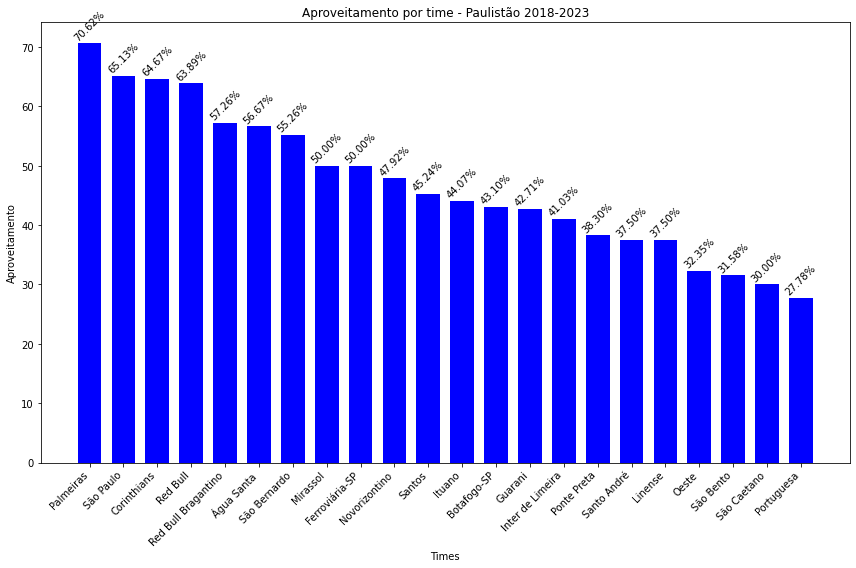

In [42]:
import matplotlib.pyplot as plt


teams = team_stats_df['Time']
victory_percentage = team_stats_df['Aproveitamento']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

# Change the color to blue
bars = ax.bar(index, sorted_percentages, bar_width, color='blue')

# Adding labels, title, and legend
ax.set_xlabel('Times')
ax.set_ylabel('Aproveitamento')
ax.set_title('Aproveitamento por time - Paulistão 2018-2023')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


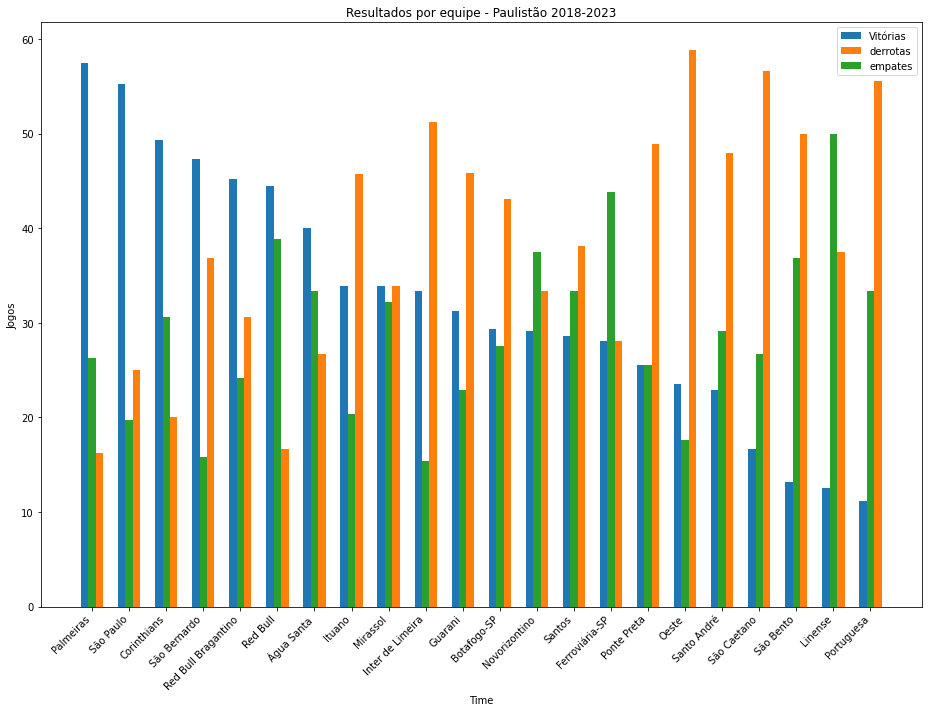

In [43]:
import matplotlib.pyplot as plt
team_stats_df = team_stats_df.sort_values(by='Percentual Vitórias', ascending=False)


teams = team_stats_df['Time']
victories = team_stats_df['Percentual Vitórias']
draws = team_stats_df['Percentual Empates']
losses = team_stats_df['Percentual Derrotas']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(13, 10))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Vitórias')
bar2 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='derrotas')
bar3 = ax.bar([i + bar_width for i in index], draws, bar_width, label='empates')

# Adding labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Jogos')
ax.set_title('Resultados por equipe - Paulistão 2018-2023')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()